Iter tools - позволяет работать с итераторами
Как разница между ген и итераторами?
Все генераторы являются итераторами
Но не все итераторы явл генераторами

Генератор содержит 1+ yield внутри. 
В целом итераторы не обязаны содержать yield. 
Они могу возращать обьект по которому можно итерировать. 
Но в результате они будут матриализовывать все итерации по которым будет происходить в цикле. 
Генераторы делают lazy, поэтому все генераторы это итераторы, но не все итераторы это ген. 

Нужно различать обьект итератора и итерируемого обьекта. 

Итератор это обьект который используется для итерации по итерируемому обьекту, используя next() dunder метод.
list - итерируется, но итератором не является. Чтоб получить итератор из итерируемого обьекта, надо воспользоваться методом iter, который возвращает обьект итератор. 



In [3]:
iterable= [1,2,3]

iterator =iter(iterable)# - будет вызван метод iter__()
print(type(iterator))

print(next(iterator)) # - будет вызван метод __next__()
print(next(iterator))
print(next(iterator))

<class 'list_iterator'>
1
2
3


In [4]:
# itertools- содержит множество функций для работы с итераторами
# Построен на генираторах, но все ген это итер

In [6]:
import itertools as it

In [8]:
even_numbers = [x for x in range(10) if x % 2 == 0]

In [9]:
even_numbers = it.count(0, 2)
even_numbers

count(0, 2)

In [10]:
# for x in even_numbers:
#     print(x)
# Будет бесконечный цикл...

In [11]:
list(next(even_numbers) for _ in range(5))

[0, 2, 4, 6, 8]

In [12]:
list(zip(it.count(), ['a', 'b', 'c']))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [13]:
def print_iterable(iterable, end = None):
    for x in iterable:
        if end:
            print(x, end = end)
        else:
            print(x)

In [15]:
#repeat - используется для генерации потока состоящей из одной константы
# Для использования функии man and zip. 
# Например можно эффективно сгенерировать последовательность квадратов натуральных чисел. 

ones = it.repeat(1, 5)
print_iterable(ones, ' ')

1 1 1 1 1 

In [16]:
list(map(pow, range(10), it.repeat(2)))
# При организации цикла с очень большим количеством итераций. Repeat будет выполняться быстрее чем range. 


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [18]:
# for _ in it.repeat(None, 10000):
#     #do shething

repeat - будет управлять счетчиком обьекта None
Есть обьект и Repeat будет управлять его счетчиком 

# for _ in range(10000):
#     # do job

In [21]:
pos_neg_ones = it.cycle([1, -1])
print(list(next(pos_neg_ones) for _ in range(10)))

letters = it.cycle(['A', 'B', 'C'])
print(list(next(letters) for _ in range(10)))

[1, -1, 1, -1, 1, -1, 1, -1, 1, -1]
['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A']


In [23]:
list(it.accumulate([1,2,3,4,5]))

[1, 3, 6, 10, 15]

In [24]:
list(it.accumulate(['A', 'B', 'C', 'D']))

['A', 'AB', 'ABC', 'ABCD']

In [27]:
list(it.accumulate([3, 1, 4, 2, 5, 3, 8, 5, 9], max))

[3, 3, 4, 4, 5, 5, 8, 8, 9]

In [29]:
list(it.chain('ABC', 'DEF'))
# Если у нас есть список и мы хотим его разложить. 
# То нам нужно изменить chain front iterable

['A', 'B', 'C', 'D', 'E', 'F']

In [31]:
list(it.chain.from_iterable(['ABC', 'DEF']))

['A', 'B', 'C', 'D', 'E', 'F']

In [33]:
list(it.chain([1,2,3], [4,5,6,4], [7,8,9]))

[1, 2, 3, 4, 5, 6, 4, 7, 8, 9]

In [34]:
list(it.dropwhile(lambda x: x<3, [1,2,3,4,5]))

[3, 4, 5]

In [35]:
list(it.takewhile(lambda x: x<3, [1,2,3,4,5]))

[1, 2]

In [41]:
list(it.filterfalse(lambda x: x%2 == 0, range(10)))

[1, 3, 5, 7, 9]

In [47]:
# С помощью функции t можно вернуть то количество экземпляров какое хочется 
iterable = iter([1,2,3])
print_iterable(iterable, ' ')
print("\niterable is exausted")
print_iterable(iterable, ' ')
# По генератору мы можем пройтись только единежды

1 2 3 
iterable is exausted


In [49]:
iterable1, iterable2 =it.tee([1,2,3], 2)

print_iterable(iterable1, ' ')
print("\niterable is exausted")
print_iterable(iterable2, ' ')

1 2 3 
iterable is exausted
1 2 3 

In [50]:
# Лучше не проходить по итератору несоклько раз. 
# Потому, что вы заставите код который генерирует элементы отрабатывать более одного раза
# Как правило в таком, случае если по генерации можно пройтись более одного раза. 
# Тогда лучше сгенерировать единежды и упаковать это в list. 
# А когда пойдем еще раз по list. Будем идти по материализованной колекции. 

In [54]:
names = ['Carlsen', 'Caruanna']
ratings = ['2711', '2744']

for name, rating in zip(names, ratings):
    print(f"{name}:{rating}")

Carlsen:2711
Caruanna:2744


In [55]:
list(zip(names, ratings))

[('Carlsen', '2711'), ('Caruanna', '2744')]

In [56]:
dict(zip(names, ratings))

{'Carlsen': '2711', 'Caruanna': '2744'}

In [58]:
names = ['Carlsen', 'Caruanna', 'Kramnik']
ratings = ['2711', '2744']

dict(zip(names, ratings))

{'Carlsen': '2711', 'Caruanna': '2744'}

In [61]:
players = dict(it.zip_longest(names, ratings, fillvalue = 0))

In [62]:
players

{'Carlsen': '2711', 'Caruanna': '2744', 'Kramnik': 0}

In [63]:
# GroupBy - возвращает итератор по картежам
# Первыми элементами которых явл. ключи
# А вторыми элементами итераторы по сгрупированным данным
# На один ключ приходиться n - элементов
# И если мы передаем ключ не по групировке, то групировка будет просходить по элементам колекции. 


In [65]:
for key, grp in it.groupby([1, 1, 1, 2, 2, 2, 3, 3]):
    print('{}:{}'.format(key, list(grp)))

1:[1, 1, 1]
2:[2, 2, 2]
3:[3, 3]


In [68]:
for key, grp in it.groupby([1, 2, 2, 2, 2, 4, 3, 2]):
    print('{}:{}'.format(key, list(grp)))

1:[1]
2:[2, 2, 2, 2]
4:[4]
3:[3]
2:[2]


In [69]:
# groupby - учитывает порядок следования элеметров
# Это функция групирует последовательно стоящие ключи
# Чтоб это избежать нужно за ранее остортировать последовательность по ключу по которому мы собираемся далее осуществить групировку
# В данным момент мы имеем дело с обыкновеннми целыми числами поэтому нужно воспользоваться функцией sort.



In [70]:
lst = [1, 2, 2, 2, 2, 4, 3, 2]
for key, grp in it.groupby(sorted(lst)):
    print('{}:{}'.format(key, list(grp)))

1:[1]
2:[2, 2, 2, 2, 2]
3:[3]
4:[4]


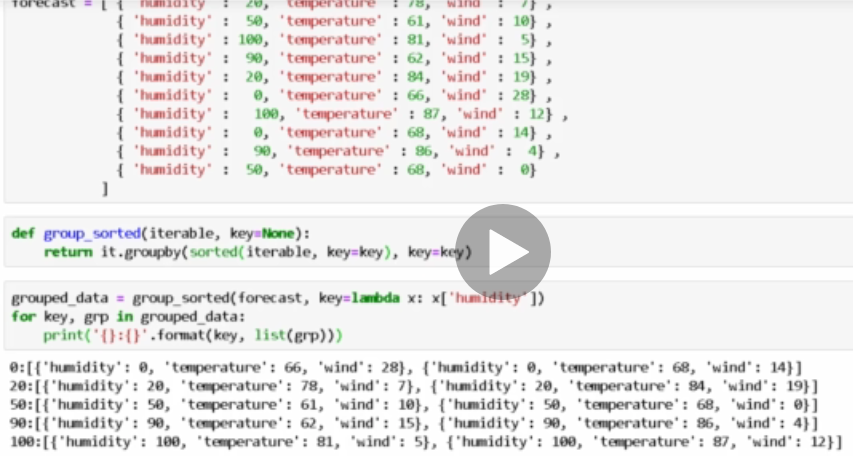

In [75]:
even_numbers = it.count(0,2)
print([x for x in range(20) if x % 2 == 0])

print(list(it.islice(even_numbers, 2, 10, 2)))
# Срез с 2 по 10 элемент с шагом 2

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[4, 8, 12, 16]


In [76]:
even_numbers = it.count(0,2)

In [79]:
even_numbers = it.count(0,2)
print(list(it.islice(even_numbers, 2, 4)))

[4, 6]


In [81]:
#Комбинаторные генераторы. Речь больше идет о статистике. 
# Предположим что наш мифический pi code состоит из 2 7 и в. И мы его забыли выведем все варианты
pin = [7, 5, 2, 8]


In [82]:
list(it.permutations(pin))

[(7, 5, 2, 8),
 (7, 5, 8, 2),
 (7, 2, 5, 8),
 (7, 2, 8, 5),
 (7, 8, 5, 2),
 (7, 8, 2, 5),
 (5, 7, 2, 8),
 (5, 7, 8, 2),
 (5, 2, 7, 8),
 (5, 2, 8, 7),
 (5, 8, 7, 2),
 (5, 8, 2, 7),
 (2, 7, 5, 8),
 (2, 7, 8, 5),
 (2, 5, 7, 8),
 (2, 5, 8, 7),
 (2, 8, 7, 5),
 (2, 8, 5, 7),
 (8, 7, 5, 2),
 (8, 7, 2, 5),
 (8, 5, 7, 2),
 (8, 5, 2, 7),
 (8, 2, 7, 5),
 (8, 2, 5, 7)]

In [86]:
ranks = ['6', '7', '8','9', '10', '3','Q', 'K', 'A']
suits = ['H', 'D', 'C', 'S']

# из этих двух сгенерируем колоду карт
lst = list(it.product(ranks, suits))
# Product перемножит последовательно элементы
lst

[('6', 'H'),
 ('6', 'D'),
 ('6', 'C'),
 ('6', 'S'),
 ('7', 'H'),
 ('7', 'D'),
 ('7', 'C'),
 ('7', 'S'),
 ('8', 'H'),
 ('8', 'D'),
 ('8', 'C'),
 ('8', 'S'),
 ('9', 'H'),
 ('9', 'D'),
 ('9', 'C'),
 ('9', 'S'),
 ('10', 'H'),
 ('10', 'D'),
 ('10', 'C'),
 ('10', 'S'),
 ('3', 'H'),
 ('3', 'D'),
 ('3', 'C'),
 ('3', 'S'),
 ('Q', 'H'),
 ('Q', 'D'),
 ('Q', 'C'),
 ('Q', 'S'),
 ('K', 'H'),
 ('K', 'D'),
 ('K', 'C'),
 ('K', 'S'),
 ('A', 'H'),
 ('A', 'D'),
 ('A', 'C'),
 ('A', 'S')]

In [88]:
# Комбинации для вытаскивания двух карт из такой колоды

len(list(it.combinations(lst,2)))

630

In [89]:
list(it.combinations('ABCD', 2))

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]